# **Email spam prediction using spambase dataset and kNN**

---

**Name**: Joshua Wilkinson

**Student Number**: C00262503

### Change Log
- added RagsX137 tutorial at the start of this notebook.
- decided to use a dataset of spam emails again to see how it compares to Naive Bayes.
- split up the dataset into training and testing data.
- fitted a kNN model.
- made some predictions on the data.
- rmse score 0.2652931110726562 on the training data, 0.3752615834836379 on the testing data.
- decided to further optimise.
- GridSearchCV rmse: 0.3035836680031732 train.
- GridSearchCV rmse: 0.3720682499336589 test.
- weighted average of neighbours based on distance rmse: 0.34431470810303233.
- bagging rmse: 0.34607729072998145.
- in summary, without optimisation the rmse score was 0.38, then I tried optimising with GridSearchCV (rmse 0.37),  using weighted average (0.34), which was the best. I found that bagging made it slightly worse (rmse 0.35).

# Tutorial : Creating a Simple Nearest Neighbor Classifier from scratch

This is based on the K Nearest Neighbours Classifier which is a useful supervised machine learning classification algorithm. But really, we want to know what happens under the hood, i.e. when we call the KNNClassifier( ) from scikit learn, what really happens?

The scope of this tutorial is to build a simple Classifier from SCRATCH! But there are a few points to consider :

- To keep the time to a minimum, I will be building a classifier which identifies only ONE neighbor (this will be futher explained).
- In the case of KNN, it uses a method of determining the distance between 'k' different points in space and using a voting method to classify, but in this case there is just 1 neighbor and hence I have eliminated the need for complexity by keeping the training algorithm very simple.
- I will be using the IRIS dataset that's built into scikit learn. Since this dataset is already simplified and has only 4 dimensions (or variables), using the neighbors classifier will be easy. It will be much harder as the number of dimensions increase.
- I'll be importing a useful tool (Euclidean Distance : Google it!) from the Scipy (SCIentific PYthon library)

# 1. Importing the dataset from sklearn
The Iris Dataset is already loaded in sklearn and more details about iris can be found here (https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [37]:
from sklearn import datasets
iris = datasets.load_iris()

In [38]:
X = iris.data
# Iris.data contains the features or independent variables.
y = iris.target
# Iris.target contains the labels or the dependent variables.

# 2. Doing a train-test split by using 50% of the data as our training set
The train-test-splitter found in the cross-valiation (now model selection module) of sklearn is a simple but powerful tool to randomly split the data into train and test datasets.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.50)

If you have used Machine Learning Classifiers in Python before, remember that there are usually 5 steps involved :
- Select the model
- Train the model
- Fit the model
- Predict the outcome
- Check the accuracy

# 3. Calling the Euclidean Distance and creating a function to call it
This works similar to the Pythagorean Theorem but it can work in more than one dimension

In [41]:
from scipy.spatial import distance  # Built in function called distance.

                                    #Defining the n dimensional distance as euc.
def euc(a,b):                       # Lists of numeric features. 
    return distance.euclidean(a,b)  # Measure and return the distance between 2 points 
                                    # i.e. the training point and a test point.

# 4. The Real Deal : Building (Coding up) the classifier
The details are explained in comment form line-by-line in the following section.

In [42]:
# First we implement a class. Classes let you structure code in a specific way.(source --> https://learnpythonthehardway.org/book/ex40.html)

class OneNeighborClassifier():                # This 'class' has 2 Methods : Fit and Predict
    
    #Each step is followed by a comment which explains how the classifier is working 
    
    def fit(self, X_train, y_train):          # Takes features and labels as input
        self.X_train = X_train                # Storing the X_train in self.X_train
        self.y_train = y_train                # Storing the y_train in self.y_train
                                              # This is like the ML classifier will memorize the values 
        
    def predict (self, X_test):               # Receives features from the testing data and returns predictions
        predictions = []                      # List of predictions, since X_test is a 2D array or a list of lists.
        for row in X_test:                    # Each row contains the features for one testing example
            label = self.closest(row)         # We are calling the function that we are creating in the next block
                                              # to find the closest training point from the test point
            predictions.append(label)         # Add the labels to the predictions list to fill it.
        return predictions                    # Return predictions as the output
    
    def closest(self, row):                   # Create the function closest such that -->
        best_dist = euc(row, self.X_train[0]) # Measure the shortest distance a test point and the first train point
        best_index = 0                        # Keep track of the index of the train point that is closest
        for i in range (1, len(self.X_train)):# Iterate over the different training points
            dist = euc(row, self.X_train[i])
            if dist < best_dist:              # The moment we find a closer one, we update our variables.
                best_dist = dist              # If dist is shorter than best_dist, then its the new best_dist
                best_index = i                # Using the index of best_dist to return label of the closest training pt.
        return self.y_train[best_index]       # Return that label

# 5. Final Steps
The classifier is built to utilize the standard pipeline that we use in scikit learn i.e. :
- Call the classifier
- Fit the model to train it
- Predict the model on the test set
- Check for accuracy between the real values and the predicted values

In [43]:
my_classifier = OneNeighborClassifier()
my_classifier.fit(X_train, y_train)

In [44]:
pred = my_classifier.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print ('Accuracy of the classifier is', accuracy_score(y_test, pred)*100, '%')

Accuracy of the classifier is 98.66666666666667 %


# Spambase

### Data pre-processing

In [46]:
import pandas as pd

spambase = pd.read_csv("spambase.data")

In [47]:
spambase.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [48]:
spambase.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [49]:
spambase.columns = [
    "word_freq_make",
    "word_freq_address",      
    "word_freq_all",  
    "word_freq_3d",           
    "word_freq_our",          
    "word_freq_over",        
    "word_freq_remove",      
    "word_freq_internet", 
    "word_freq_order",    
    "word_freq_mail",       
    "word_freq_receive",      
    "word_freq_will",       
    "word_freq_people",       
    "word_freq_report",     
    "word_freq_addresses",    
    "word_freq_free",     
    "word_freq_business",   
    "word_freq_email",        
    "word_freq_you",      
    "word_freq_credit",       
    "word_freq_your",         
    "word_freq_font",         
    "word_freq_000",       
    "word_freq_money",        
    "word_freq_hp",          
    "word_freq_hpl",        
    "word_freq_george",       
    "word_freq_650",          
    "word_freq_lab",          
    "word_freq_labs",         
    "word_freq_telnet",       
    "word_freq_857",         
    "word_freq_data",         
    "word_freq_415",          
    "word_freq_85",    
    "word_freq_technology",   
    "word_freq_1999",      
    "word_freq_parts",        
    "word_freq_pm",        
    "word_freq_direct",       
    "word_freq_cs",       
    "word_freq_meeting",      
    "word_freq_original",     
    "word_freq_project",      
    "word_freq_re",          
    "word_freq_edu",         
    "word_freq_table",    
    "word_freq_conference", 
    "char_freq_;",          
    "char_freq_(",            
    "char_freq_[",            
    "char_freq_!",            
    "char_freq_$",            
    "char_freq_#",            
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
    "nominal_spam_identifier"
]

In [50]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,nominal_spam_identifier
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [51]:
spambase.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [52]:
spambase["nominal_spam_identifier"]

0       1
1       1
2       1
3       1
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: nominal_spam_identifier, Length: 4600, dtype: int64

### Import Matplotlib

In [53]:
import matplotlib.pyplot as plt

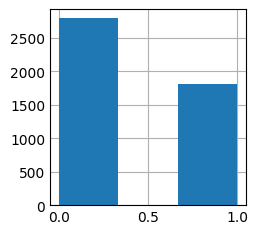

In [54]:
plt.style.use('_mpl-gallery-nogrid')
spambase["nominal_spam_identifier"].hist(bins=3)
plt.show()

### Correlation matrix

In [55]:
correlation_matrix = spambase.corr()
correlation_matrix["nominal_spam_identifier"]

word_freq_make                0.126323
word_freq_address            -0.030318
word_freq_all                 0.196840
word_freq_3d                  0.057394
word_freq_our                 0.241958
word_freq_over                0.232741
word_freq_remove              0.332255
word_freq_internet            0.206915
word_freq_order               0.231680
word_freq_mail                0.139088
word_freq_receive             0.234651
word_freq_will                0.007711
word_freq_people              0.133034
word_freq_report              0.060085
word_freq_addresses           0.195987
word_freq_free                0.263236
word_freq_business            0.263338
word_freq_email               0.203777
word_freq_you                 0.273657
word_freq_credit              0.189839
word_freq_your                0.383265
word_freq_font                0.091907
word_freq_000                 0.334924
word_freq_money               0.216206
word_freq_hp                 -0.256680
word_freq_hpl            

### Fit a kNN with scikit-learn

In [56]:
X = spambase.drop("nominal_spam_identifier", axis=1)
X = X.values
y = spambase["nominal_spam_identifier"]
y = y.values

### Splitting data into training and testing data

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

### Fitting a kNN regression

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [59]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### root-mean-square-error (rmse)
- low number should be good

Training data error

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.2652931110726562

Test data error

In [61]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.3752615834836379

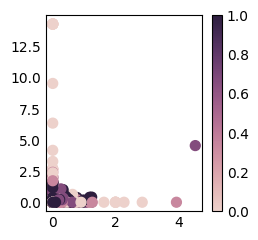

In [62]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

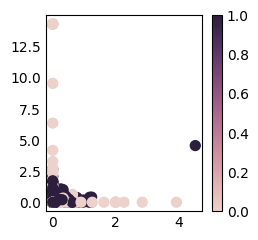

In [63]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

# Tune and Optimise kNN
How can we lower the test error?

In [64]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [65]:
# best performing value of k
gridsearch.best_params_

{'n_neighbors': 5}

Now that we know what the best value for k is, we can see how it affects the training and testing performances.

In [66]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

0.3035836680031732

The training error should be worse, but the test error should be better, which it is:

In [67]:
test_rmse

0.3720682499336589

### Adding Weighted Average of Neighbours Based on Distance

Will performance be any better when predicting using a weighted average instead of a regular one?

In [68]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

gridsearch.best_params_

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.34431470810303233

Applying the weighted average seems to have reduced the test error from 37% to 34%.

### Further Improving on kNN in scikit-learn With Bagging

In [69]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights
)

In [70]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=9,
                                               weights='distance'),
                 n_estimators=100)

In [71]:
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.34513623212678485

Not much difference! On average, we are 0.35 off each prediction.

# References
- [RagsX137, Tutorial : Creating a Simple Nearest Neighbor Classifier from scratch.](https://notebook.community/RagsX137/TF_Tutorial/My+own+KNN+Classifier)
- [Hopkins,Mark, Reeber,Erik, Forman,George, and Suermondt,Jaap. (1999). Spambase. UCI Machine Learning Repository.](https://doi.org/10.24432/C53G6X)